In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el conjunto de datos
data = pd.read_csv('../../Datos/SinProcesar/personality_dataset.csv')

# Mostrar las primeras filas del dataset
print("Primeras filas del dataset:")
print(data.head())

Primeras filas del dataset:
   Time_spent_Alone Stage_fear  Social_event_attendance  Going_outside  \
0               4.0         No                      4.0            6.0   
1               9.0        Yes                      0.0            0.0   
2               9.0        Yes                      1.0            2.0   
3               0.0         No                      6.0            7.0   
4               3.0         No                      9.0            4.0   

  Drained_after_socializing  Friends_circle_size  Post_frequency Personality  
0                        No                 13.0             5.0   Extrovert  
1                       Yes                  0.0             3.0   Introvert  
2                       Yes                  5.0             2.0   Introvert  
3                        No                 14.0             8.0   Extrovert  
4                        No                  8.0             5.0   Extrovert  


In [42]:
print("Información general del dataset:")
print(data.info())  # Información básica como tipos de datos y cantidad de valores no nulos


Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2900 non-null   float64
 1   Stage_fear                 2900 non-null   object 
 2   Social_event_attendance    2900 non-null   float64
 3   Going_outside              2900 non-null   float64
 4   Drained_after_socializing  2900 non-null   object 
 5   Friends_circle_size        2900 non-null   float64
 6   Post_frequency             2900 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB
None


In [43]:
print("\nResumen estadístico de las columnas numéricas:")
print(data.describe())  # Estadísticas descriptivas



Resumen estadístico de las columnas numéricas:
       Time_spent_Alone  Social_event_attendance  Going_outside  \
count       2900.000000              2900.000000    2900.000000   
mean           4.505816                 3.963354       3.000000   
std            3.441180                 2.872608       2.221597   
min            0.000000                 0.000000       0.000000   
25%            2.000000                 2.000000       1.000000   
50%            4.000000                 3.963354       3.000000   
75%            7.000000                 6.000000       5.000000   
max           11.000000                10.000000       7.000000   

       Friends_circle_size  Post_frequency  
count          2900.000000     2900.000000  
mean              6.268863        3.564727  
std               4.232340        2.893587  
min               0.000000        0.000000  
25%               3.000000        1.000000  
50%               5.000000        3.000000  
75%              10.000000       

In [44]:
# 2. Verificar valores nulos en el dataset
print("\nCantidad de valores nulos por columna:")
print(data.isnull().sum())  # Sumar los valores nulos


Cantidad de valores nulos por columna:
Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64


Como no hacen falta datos, se convierten los datos no numéricos a numéricos para poder buscar correlaciones entre la variable objetivo y todas las demás variables.

/tmp/ipykernel_20442/2539310611.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['Introvertido', 'Extrovertido'])
/tmp/ipykernel_20442/2539310611.py:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  means[personality],
/tmp/ipykernel_20442/2539310611.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['Introvertido', 'Extrovertido'])
/tmp/ipykernel_20442/2539310611.py:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, us

<Figure size 1400x1000 with 0 Axes>

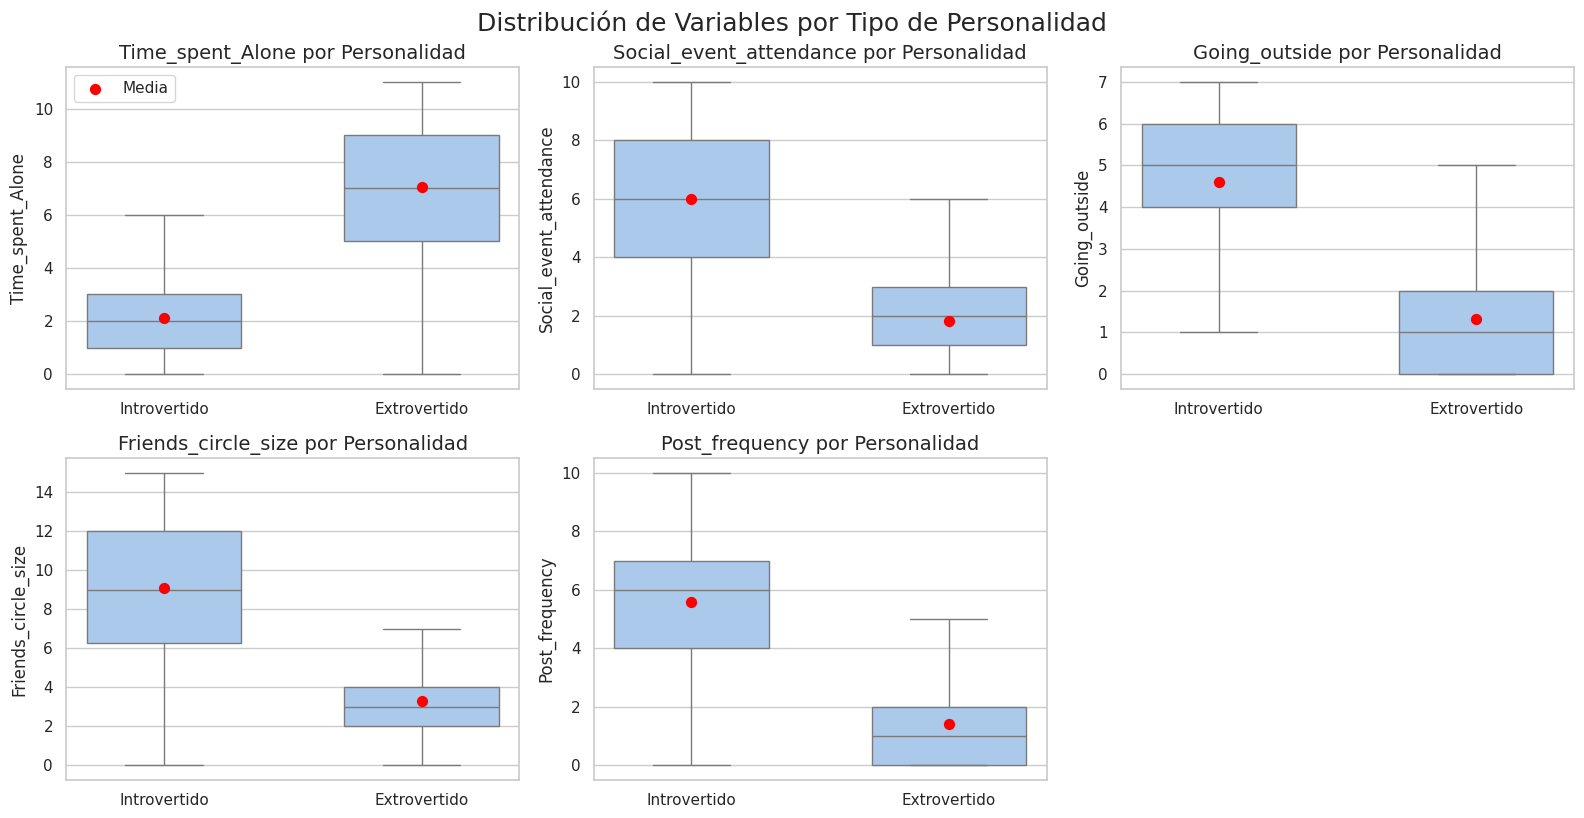

/home/jcrojasd/Documents/DexFreight/hpm-containers-opt/myenv/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/jcrojasd/Documents/DexFreight/hpm-containers-opt/myenv/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/jcrojasd/Documents/DexFreight/hpm-containers-opt/myenv/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/hom

<Figure size 1400x1000 with 0 Axes>

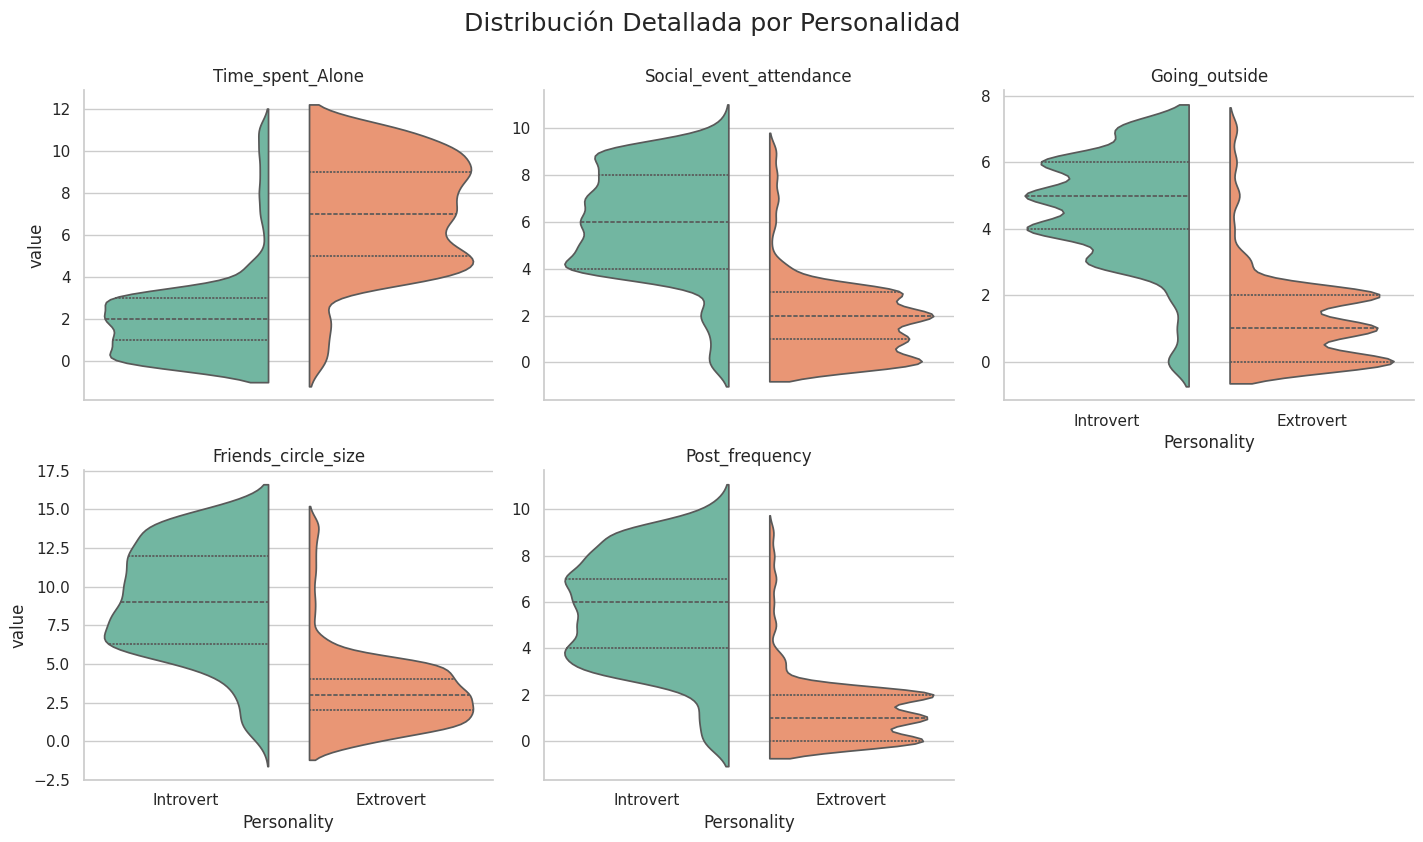

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Configurar estilo visual
sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(14, 10))

# Lista de variables numéricas (excluyendo Personality)
numeric_vars = data.select_dtypes(include=['number']).columns

# Calcular disposición de subplots
n_cols = 3
n_rows = (len(numeric_vars) + n_cols - 1) // n_cols

# Crear subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows*4))
axes = axes.flatten()  # Aplanar para iteración fácil

# Generar boxplots para cada variable
for i, var in enumerate(numeric_vars):
    sns.boxplot(
        x='Personality', 
        y=var, 
        data=data,
        ax=axes[i],
        showfliers=False,  # Omitir outliers para mejor visualización
        width=0.6
    )
    
    # Personalizar títulos y etiquetas
    axes[i].set_title(f'{var} por Personalidad', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_xticklabels(['Introvertido', 'Extrovertido'])
    
    # Añadir media como punto rojo
    means = data.groupby('Personality')[var].mean()
    for j, personality in enumerate([0, 1]):
        axes[i].scatter(
            j, 
            means[personality], 
            color='red', 
            s=50, 
            zorder=5,
            label='Media' if j == 0 else ""
        )
    
    # Solo añadir leyenda al primer gráfico
    if i == 0:
        axes[i].legend()

# Eliminar ejes vacíos si los hay
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Distribución de Variables por Tipo de Personalidad', fontsize=18, y=1.02)
plt.show()

# Versión alternativa: Grid de violines
plt.figure(figsize=(14, 10))
g = sns.FacetGrid(
    data.melt(id_vars='Personality', value_vars=numeric_vars), 
    col='variable', 
    col_wrap=3,
    sharey=False,
    height=4,
    aspect=1.2
)
g.map_dataframe(
    sns.violinplot, 
    x='Personality', 
    y='value',
    split=True,
    inner="quartile",
    palette="Set2"
)
g.set_titles("{col_name}")
g.set_xticklabels(['Introvert', 'Extrovert'])
g.fig.suptitle('Distribución Detallada por Personalidad', fontsize=18, y=1.05)
plt.show()

Gráficos de distribución para variables numéricas:


<Figure size 1600x1200 with 0 Axes>

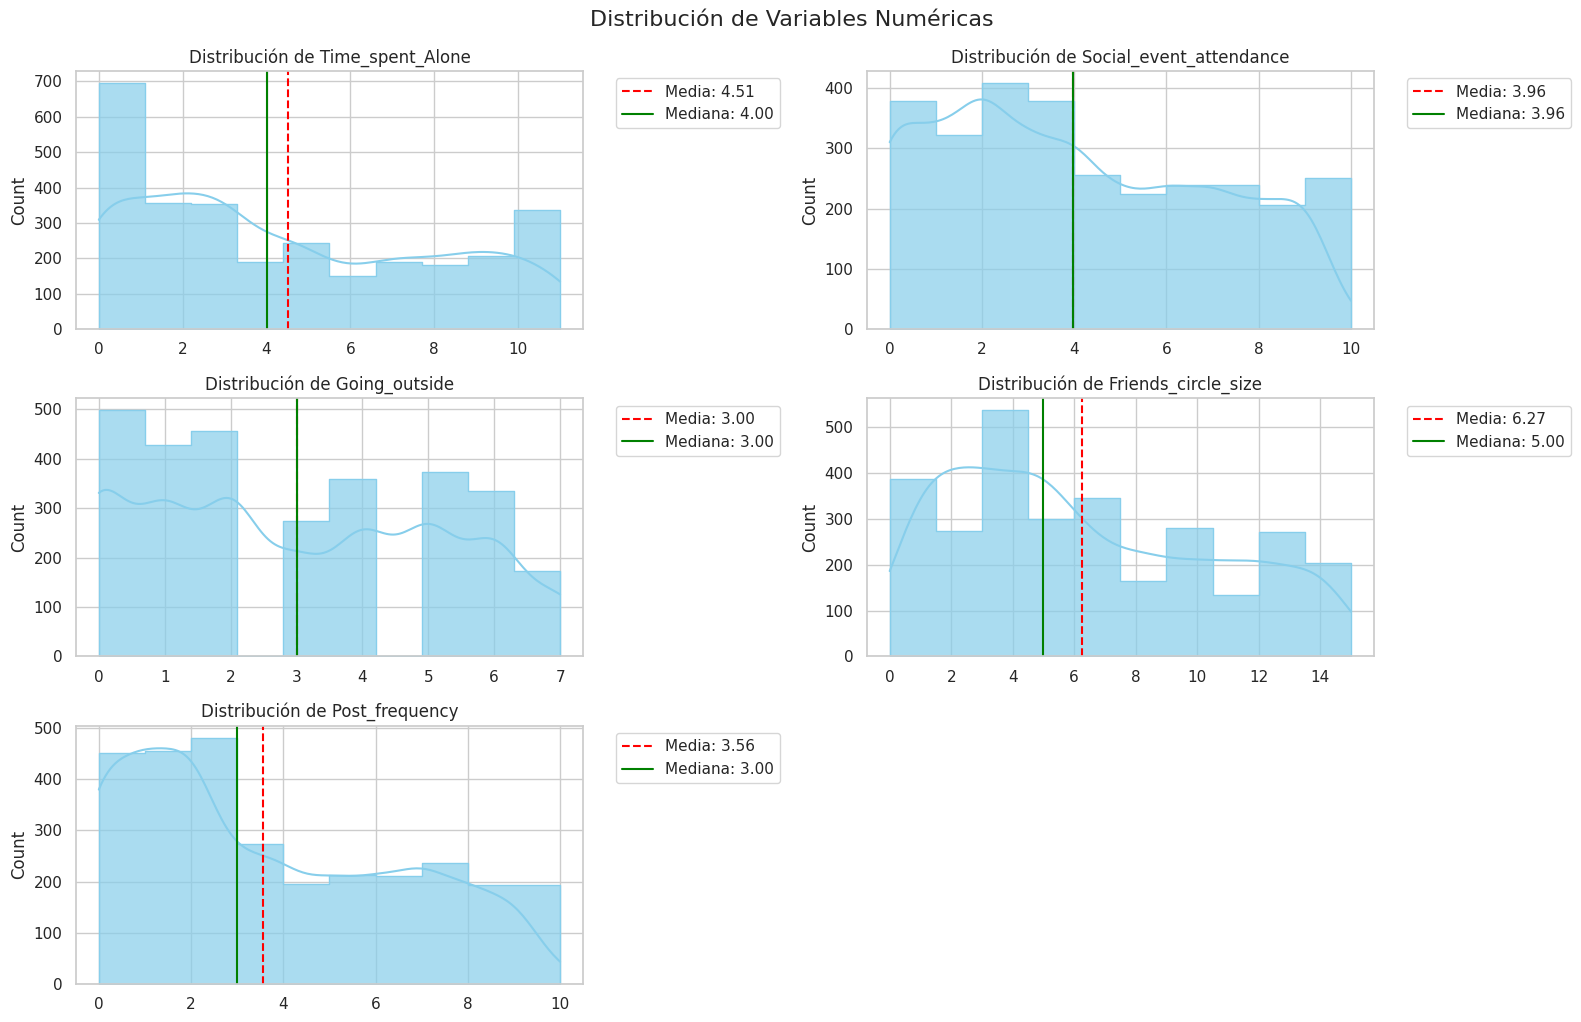


Gráficos de distribución para variables categóricas:


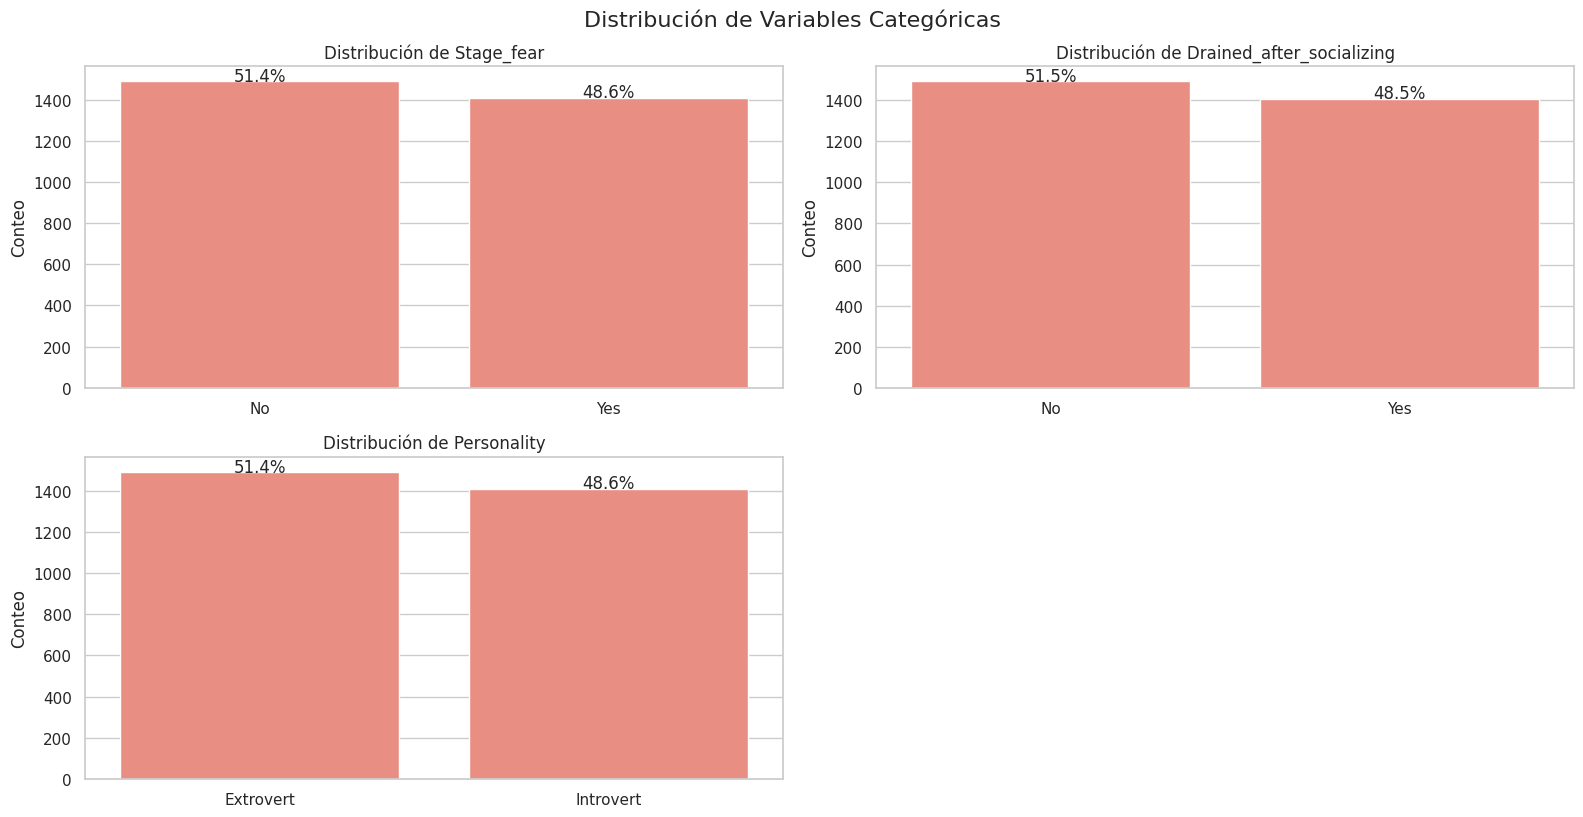

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Configuración estética
sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(16, 12))

# 1. Separar variables numéricas y categóricas
numeric_cols = data.select_dtypes(include=['number']).columns
categorical_cols = data.select_dtypes(exclude=['number']).columns

# 2. Gráficos para variables numéricas (10 bins)
print("Gráficos de distribución para variables numéricas:")
plt.figure(figsize=(16, 10))

# Determinar número de subplots necesarios
n_cols = 2
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    
    # Determinar si es variable continua (más de 5 valores únicos)
    is_continuous = data[col].nunique() > 5
    
    if is_continuous:
        # Histograma con 10 bins y curva de densidad para variables continuas
        sns.histplot(
            data=data, 
            x=col, 
            bins=10, 
            kde=True,
            element="step",
            color='skyblue',
            alpha=0.7
        )
        
        # Líneas verticales para estadísticos importantes
        mean_val = data[col].mean()
        median_val = data[col].median()
        plt.axvline(mean_val, color='red', linestyle='--', linewidth=1.5, label=f'Media: {mean_val:.2f}')
        plt.axvline(median_val, color='green', linestyle='-', linewidth=1.5, label=f'Mediana: {median_val:.2f}')
        
        # Ajustar posición de la leyenda
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    else:
        # Gráfico de barras para variables discretas
        value_counts = data[col].value_counts().sort_index()
        bars = plt.bar(value_counts.index, value_counts.values, color='skyblue', alpha=0.7)
        
        # Añadir etiquetas con los conteos
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height}', ha='center', va='bottom')
    
    plt.title(f'Distribución de {col}', fontsize=12)
    plt.xlabel('')
    
plt.tight_layout()
plt.suptitle('Distribución de Variables Numéricas', fontsize=16, y=1.02)
plt.show()

# 3. Gráficos para variables categóricas (código original se mantiene igual)
if len(categorical_cols) > 0:
    print("\nGráficos de distribución para variables categóricas:")
    n_cols = 2
    n_rows = int(np.ceil(len(categorical_cols) / n_cols))
    
    plt.figure(figsize=(16, 4 * n_rows))
    
    for i, col in enumerate(categorical_cols, 1):
        plt.subplot(n_rows, n_cols, i)
        
        # Gráfico de conteo con porcentajes
        ax = sns.countplot(
            x=col, 
            data=data,
            order=data[col].value_counts().index,
            color='salmon'
        )
        
        # Añadir porcentajes en las barras
        total = len(data[col])
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x() + p.get_width()/2., height + 3,
                    f'{height/total:.1%}', ha='center')
        
        plt.title(f'Distribución de {col}', fontsize=12)
        plt.xlabel('')
        plt.ylabel('Conteo')
    
    plt.tight_layout()
    plt.suptitle('Distribución de Variables Categóricas', fontsize=16, y=1.02)
    plt.show()
else:
    print("No hay variables categóricas en el dataset")

In [47]:
# Mapear valores a numéricos
data['Personality_num'] = data['Personality'].map({'Extrovert': 1, 'Introvert': 0})
data['Stage_fear'] = data['Stage_fear'].map({'Yes': 1, 'No': 0})
data['Drained_after_socializing'] = data['Drained_after_socializing'].map({'Yes': 1, 'No': 0})

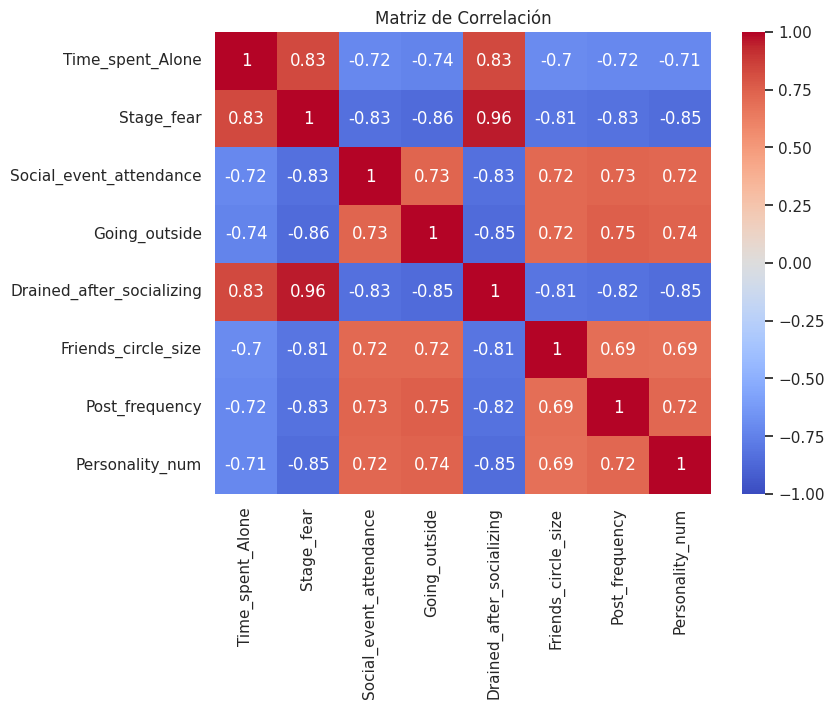

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar columnas relevantes
df_numeric = data.select_dtypes(include=['number'])

# Calcular matriz de correlación
correlation_matrix = df_numeric.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

Identificar grupos naturales en los datos:

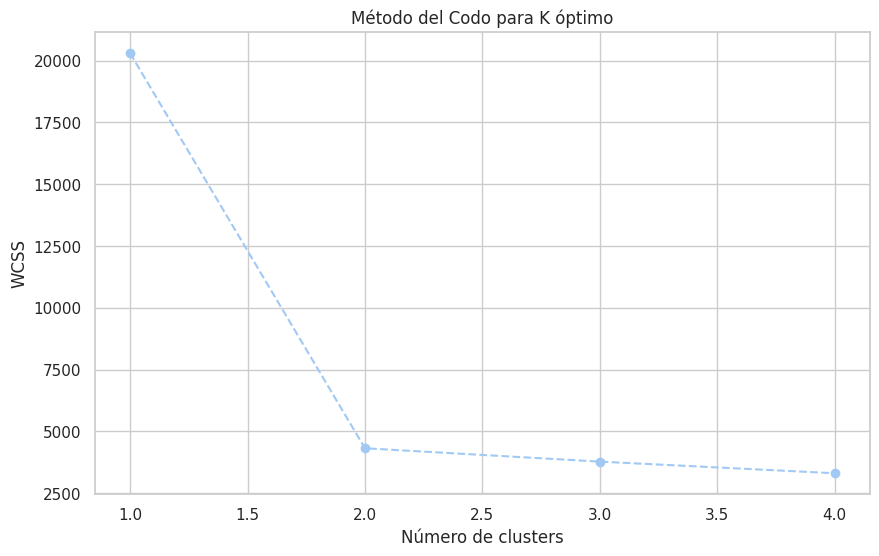

Distribución de clusters vs personalidad:
Personality  Extrovert  Introvert
Cluster                          
0                 1380         79
1                  111       1330


In [49]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Seleccionar variables y escalar
variables = ['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance', 
             'Going_outside', 'Drained_after_socializing', 
             'Friends_circle_size', 'Post_frequency']
X = data[variables]
X_scaled = StandardScaler().fit_transform(X)

# Determinar número óptimo de clusters (método del codo)
wcss = []
for i in range(1, 5):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 5), wcss, marker='o', linestyle='--')
plt.title('Método del Codo para K óptimo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

# Aplicar K-Means con 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Comparar con variable Personality
cluster_comparison = pd.crosstab(clusters, data['Personality'], 
                                rownames=['Cluster'], 
                                colnames=['Personality'])
print("Distribución de clusters vs personalidad:")
print(cluster_comparison)

Dada la alta correlación entre variables, podemos reducir la dimensionalidad:

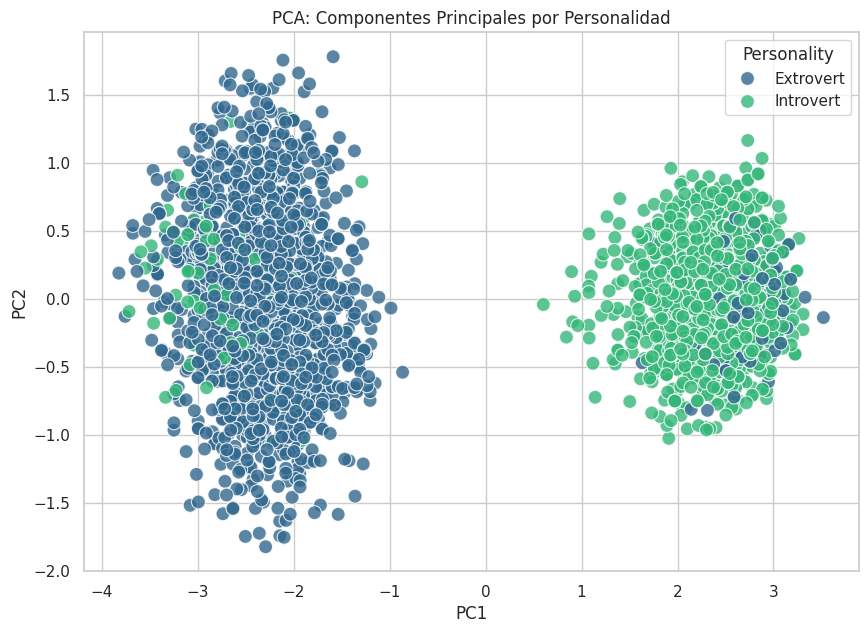

In [50]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Seleccionar variables y escalar
variables = ['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance', 
             'Going_outside', 'Drained_after_socializing', 
             'Friends_circle_size', 'Post_frequency']
X = data[variables]
X_scaled = StandardScaler().fit_transform(X)

# Aplicar PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Crear dataframe con componentes
pca_df = pd.DataFrame(data=principal_components, 
                      columns=['PC1', 'PC2'])
pca_df['Personality'] = data['Personality']

# Graficar
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='Personality', data=pca_df, 
                palette='viridis', s=100, alpha=0.8)
plt.title('PCA: Componentes Principales por Personalidad')
plt.xlabel(f'PC1')
plt.ylabel(f'PC2')
plt.show()

In [51]:
import numpy as np
# Obtener los componentes (loadings)
loadings = pca.components_

# Crear DataFrame de loadings
loadings_df = pd.DataFrame(
    loadings.T,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=variables
)

print("Cargas factoriales (Loadings):")
print(loadings_df)

# Calcular contribución relativa
contrib_pc1 = 100 * np.square(loadings[0]) / np.sum(np.square(loadings[0]))
contrib_pc2 = 100 * np.square(loadings[1]) / np.sum(np.square(loadings[1]))

# Crear tabla
contrib_df = pd.DataFrame({
    'Variable': variables,
    'Contribution_PC1': contrib_pc1,
    'Contribution_PC2': contrib_pc2
}).sort_values('Contribution_PC1', ascending=False)

print("Contribución porcentual a cada componente:")
print(contrib_df)

Cargas factoriales (Loadings):
                                PC1       PC2
Time_spent_Alone           0.366313  0.153520
Stage_fear                 0.405143  0.024741
Social_event_attendance   -0.367535  0.124887
Going_outside             -0.373905 -0.222887
Drained_after_socializing  0.404230  0.030194
Friends_circle_size       -0.359470  0.819532
Post_frequency            -0.366286 -0.487852
Contribución porcentual a cada componente:
                    Variable  Contribution_PC1  Contribution_PC2
1                 Stage_fear         16.414105          0.061212
4  Drained_after_socializing         16.340218          0.091166
3              Going_outside         13.980530          4.967883
2    Social_event_attendance         13.508204          1.559674
0           Time_spent_Alone         13.418511          2.356845
6             Post_frequency         13.416564         23.799935
5        Friends_circle_size         12.921868         67.163286


Los datos se pasan a una base de datos para simular un servidor real donde se guardan los datos limpios

In [52]:
import sqlite3
import os

# Crear la ruta completa y asegurar que exista el directorio
db_path = '../../Datos/Procesado/Preproc_Personality_Dataset.db'
os.makedirs(os.path.dirname(db_path), exist_ok=True)

# Crear conexión a la base de datos SQLite
con = sqlite3.connect(db_path)

# Guardar el DataFrame en la base de datos
data.to_sql(
    name='personality_data',  # Nombre de la tabla
    con=con,                 # Conexión a la base de datos
    if_exists='replace',     # Opciones: 'fail', 'replace', 'append'
    index=False              # No incluir el índice del DataFrame
)

# Cerrar la conexión
con.close()